# Tutorial of tpfi

In this notebook, we will demonstrate how to use the `plot_identification` and `plot_season` functions to visualize target pixel files and their corresponding sky charts.

In [1]:
%matplotlib inline
import lightkurve as lk
from matplotlib import pyplot as plt

from tpfi import plot_identification, plot_season

## Using `plot_identification`

The `plot_identification` function allows you to visualize a target pixel file and its corresponding sky chart. Here's an example of how to use it:

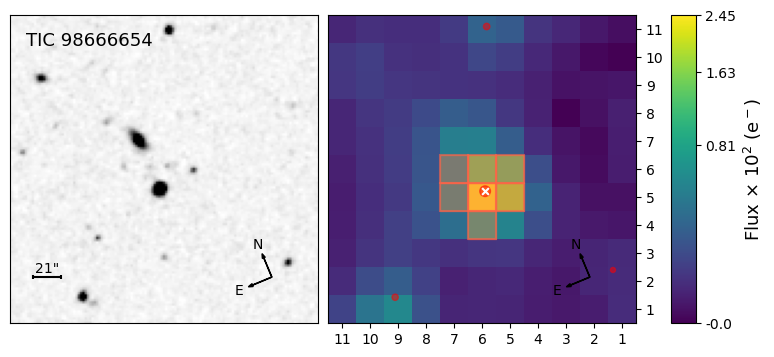

In [2]:
# Create a TPF object using lightkurve
# See https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html for details

tpf = lk.search_targetpixelfile("TIC98666654", sector=3, exptime=120, author="SPOC").download()

# Plot identification chart of the TPF
plot_identification(tpf)

You can increase the `mag_limit` parameter to show more stars in the right panel (default `mag_limit=18` for TESS, `mag_limit=19.5` for Kepler/K2), or decrease it to show less stars.

The cmap of the right panel can be customized by the `cmap` parameter, and the color of the stars and the pipeline mask can also be customized by the `c_star` and `c_mask` parameter separately.

You can also set `verbose=True` to show more infomation.

Querying Sky Image...
Target Gaia Source DR3 ID: 2362319737507190528


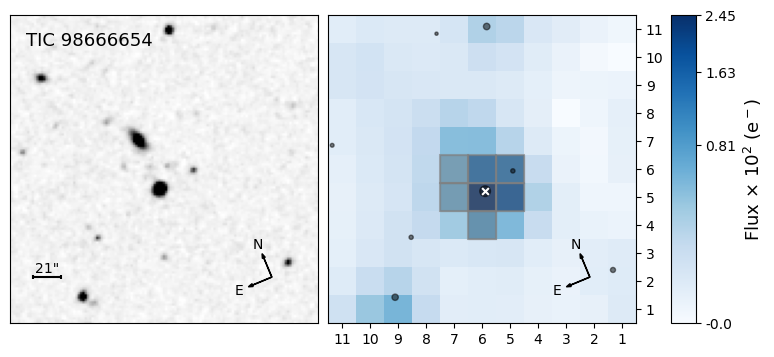

In [3]:
plot_identification(tpf, mag_limit=20, cmap="Blues", c_star="k", c_mask="grey", verbose=True)

Besides, you can set the `ax` parameter to specify a matplotlib axes object to plot into.

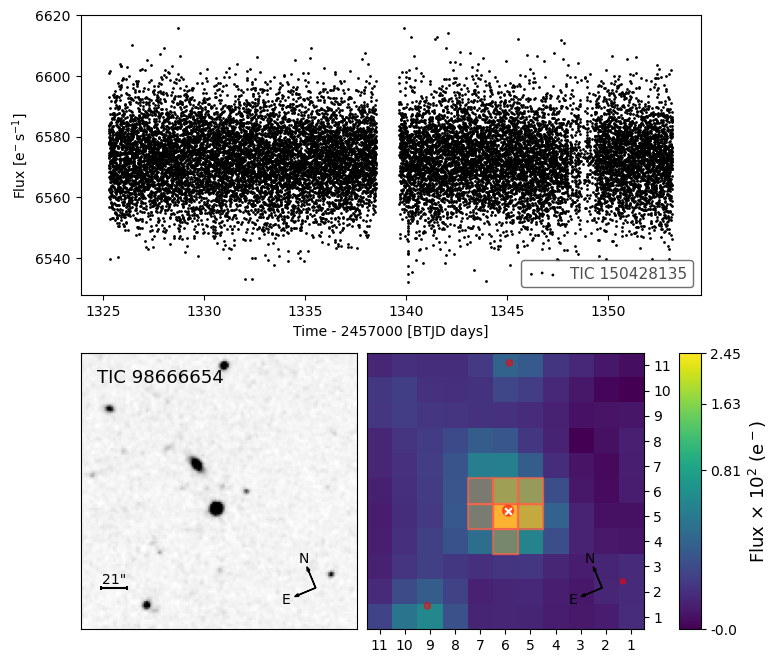

In [4]:
lc = lk.search_lightcurve("TIC150428135", sector=1, exptime=120, author="SPOC").download()

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
lc.scatter(ax=axes[0], c="k")
plot_identification(tpf, ax=axes[1])

## Using `plot_season`

The `plot_season` function allows you to visualize the TPFs of a Kepler target from different seasons. Here's an example of how to use it:

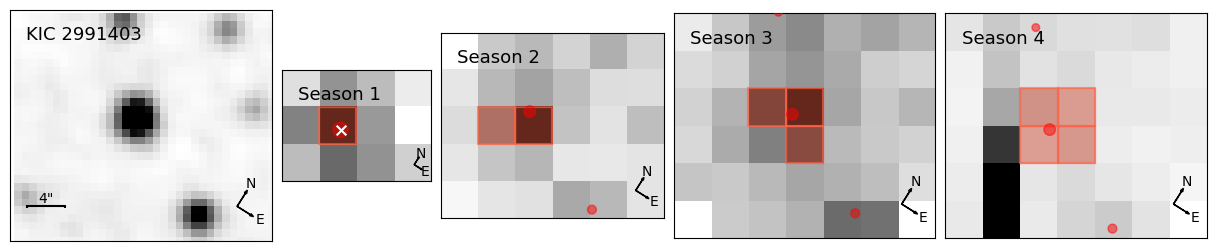

In [5]:
plot_season("KIC2991403")

You can change `mag_limit`, `cmap`, `c_star`, `c_mask`, `verbose` and `ax` similar to the `plot_identification` function.

Found 4 seasons
Querying Sky Image...
Target Gaia Source DR3 ID: 2052662903395436672


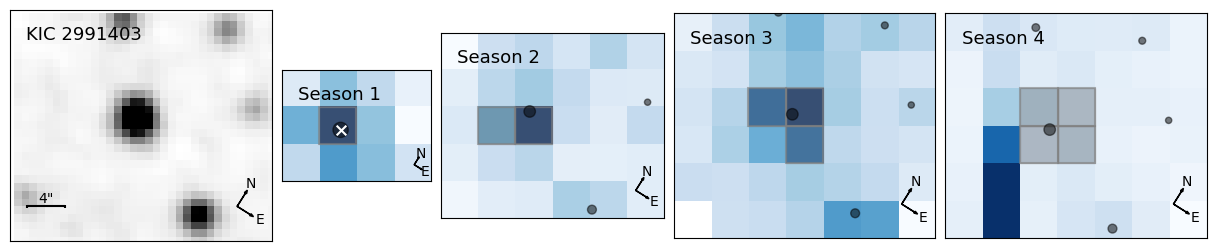

In [6]:
plot_season("KIC2991403", mag_limit=20, cmap="Blues", c_star="k", c_mask="grey", verbose=True)